<div id="h-1"></div>

# Gestione dei dati

In [1]:
%matplotlib inline

import csv
import numpy as np
import pandas as pd
from scipy.constants import golden
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

 #lettura file csv, ritorna una lista
with open ('data/heroes.csv', 'r') as data_file:
    data_reader = csv.reader(data_file, delimiter = ';')
    data = list(data_reader)[1:]

#ottendendo l'anno di prima apparizione
years = [int(h[7]) if h[7] else None for h in data]
name = [h[0] for h in data]
first_appearance = pd.Series(years, index=name)
first_appearance

#accesso ai dati
(first_appearance['Wonder Woman'], first_appearance.loc['Wonder Woman'])
(first_appearance[128], first_appearance.iloc[128])



(1992.0, 1992.0)

<div class="alert alert-warning">
Se l'indice di una serie è basato su valori interi, i valori tra parentesi quadre immediatamente dopo la serie faranno riferimento all'indice e non alla posizione: ciò potrebbe essere fuorviante se gli elementi dell'indice non partono da zero e non sono consecutivi.
</div>

In [2]:
#Visualizzazione delle frequenze assolute
first_appearance.value_counts().sort_values(ascending = False)

1964.0    18
1963.0    18
1965.0    14
2004.0    11
1975.0    10
          ..
1939.0     1
2009.0     1
2099.0     1
1945.0     1
1988.0     1
Length: 71, dtype: int64

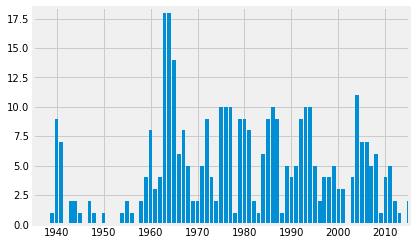

In [3]:
#Graficando una serie
%matplotlib inline
import matplotlib.pyplot as plt

first_app_freq = first_appearance.value_counts()

plt.bar(first_app_freq.index, first_app_freq.values)
#gestione outlier
plt.xlim((1935, 2015))
plt.ylim(0, 18.5)
plt.show()


In [4]:
#Operazioni con le serie
#totale persone dopo il 1960
sum(first_app_freq[1960:])

#se le operazioi sono più complesse
names = [h[0] for h in data]
height = pd.Series([float(h[4]) if h[4] else None for h in data], index = names)

height.apply(lambda h: (h/100)**2)

A-Bomb         4.129430
Abraxas             NaN
Abomination    4.122524
Adam Monroe         NaN
Agent 13       3.007103
                 ...   
Alan Scott     3.275376
Amazo          6.630110
Ant-Man        4.483383
Ajax           3.738036
Alex Mercer         NaN
Length: 735, dtype: float64

In [5]:
#Dataframe
#lettura da csv, ritorna un dataframe
data = pd.read_csv('data/heroes.csv', sep = ';', index_col = 0)

#anche qui possono usare loc e iloc
data.loc['Professor X', 'Height':'Weight']

#Indici di centralità
data['Height'].mean() #media 
data['Height'].mode() #moda
data['Height'].median() #mediana

#indici di dispersione
data['Height'].quantile(.75) - data['Height'].quantile(.25) #range interquartile 
data['Height'].var() #varianza
data['Height'].std() #dev std

59.18525003704559

In [6]:
data.iloc[[106, 103], [3, 4]]

,Height,Weight
Name,,
Tempest,163.02,54.36
Supergirl,165.40,54.80


In [7]:
#Ordinamento dei dati
data.sort_values(by='Weight', ascending=False)[:5]

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
Sasquatch,Walter Langkowski,"Edmonton, Alberta, Canada",Marvel Comics,305.02,900.70,M,NaN,Red,Orange,80.0,good
Juggernaut,Cain Marko,"Berkeley, California",Marvel Comics,287.95,855.82,M,1965.0,Blue,Red,100.0,average
Darkseid,Uxas,NaN,DC Comics,267.37,817.57,M,1970.0,Red,No Hair,100.0,high
Hulk,Bruce Banner,"Dayton, Ohio",Marvel Comics,244.40,630.90,M,1962.0,Green,Green,100.0,high
Giganta,Doris Zuel,NaN,DC Comics,62.65,630.80,F,1944.0,Green,Red,90.0,high


In [8]:
#Gestione delle frequenze
#pd.crosstab ritorna un daaframe, specificando normalize = True si ottiene la tabella delle frequenze relative
heroes_with_year = data[data['First appearance'] < 2020]
publisher_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                             columns=['Abs. frequence'],
                             colnames=[''],
                            normalize = False, margins = False)
publisher_rel_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                                 columns=['Rel. frequence'],
                                 colnames=[''],
                                 normalize=True)
publisher_rel_freq.apply(lambda h: np.round(h*100,2))

,Rel. frequence
Publisher,
ABC Studios,1.11
DC Comics,33.61
Dark Horse Comics,3.33
George Lucas,3.06
Hanna-Barbera,0.28
Image Comics,0.83
Marvel Comics,56.94
Rebellion,0.28
Star Trek,0.28


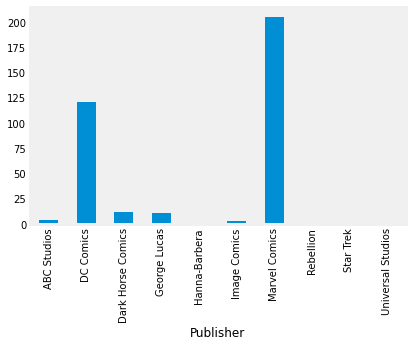

In [9]:
#Visualizzazione frequenze
publisher_freq.plot.bar(legend = False)
plt.grid()
plt.show()

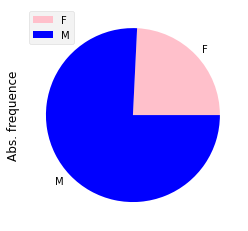

In [10]:
#Utilizzare le frequenze relative conviene particolarmente quando il numero di osservazioni è viariabile
gender_freq = pd.crosstab(index=heroes_with_year['Gender'],
                          columns=['Abs. frequence'],
                          colnames=[''])
gender_freq.plot.pie(y='Abs. frequence', colors=['pink', 'blue'])
plt.show()

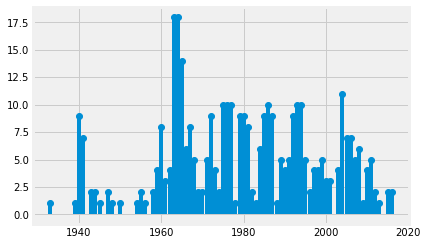

In [11]:
# grafico a bastoncini in cui ogni punto è evidenziato, 
#piuttosto che da una barra, da un segmento verticale che lo congiunge con l'asse delle ascisse
heroes_with_year = data[data['First appearance'] < 2020]
first_app_freq = heroes_with_year['First appearance'].value_counts()
plt.vlines(first_app_freq.index, 0, first_app_freq.values)
plt.plot(first_app_freq.index, first_app_freq.values, 'o')
plt.show()

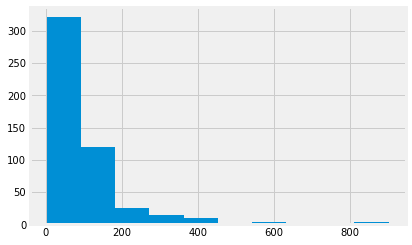

In [12]:
data['Weight'].hist()
plt.show()

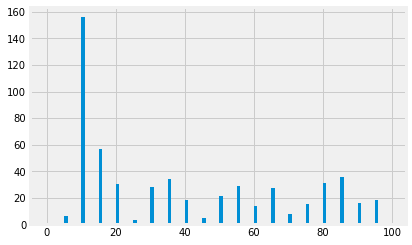

In [13]:
peso = data['Strength']
bins = np.arange(0,peso.max(),1)
peso.hist(bins = np.hstack(bins))
plt.show()
#bins = numero di sotto-intervalli equiampi

frequenze cumulate, che si possono calcolare quando esiste una relazione di ordine per i valori del carattere. Essenzialmente si tratta di considerare i valori del carattere dal più piccolo al più grande, di calcolare le relative frequenze e di cumularle in modo che al primo elemento sia associata la sua frequenza, al secondo la somma delle frequenze dei primi due elementi, al terzo la somma delle prime tre frequenze e così via.

In [14]:
first_app_freq_cumulate = pd.crosstab(index=heroes_with_year['First appearance'],
                                       columns=['Cumulate freq.'],
                                       colnames=['']).cumsum()
first_app_freq_cumulate.head()

,Cumulate freq.
First appearance,
1933.0,1
1939.0,2
1940.0,11
1941.0,18
1943.0,20


Frequenze e frequenze cumulate di una variabile categorica possono essere considerate congiuntamente per generare un diagramma di Pareto nel modo seguente: ordinando i dati per frequenza decrescente, su uno stesso sistema di riferimento in cui l'asse delle ascisse fa riferimento ai valori della variabile si sovrappongono il diagramma a barre delle frequenze e una linea spezzata che collega i valori delle frequenze cumulate


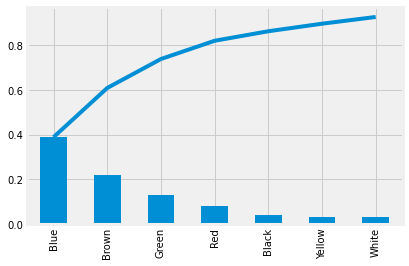

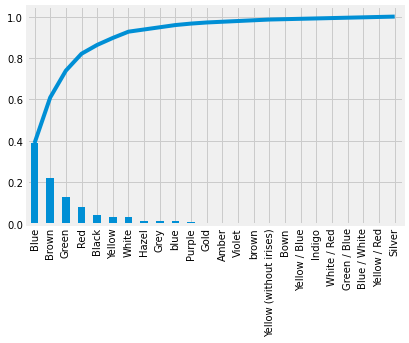

In [15]:
eye_color = data['Eye color']
eye_color_freq = eye_color.value_counts(normalize=True)

eye_color_freq[eye_color_freq>.02].cumsum().plot()
eye_color_freq[eye_color_freq>.02].plot.bar()
plt.show()

def my_pareto(data, threshold=0.02, renormalize=False):
    freq = data.value_counts(normalize=True)
    freq = freq[freq > threshold]
    if renormalize:
        freq = freq / sum(freq)
    freq.cumsum().plot()
    freq.plot.bar()

my_pareto(data['Eye color'], threshold=0)

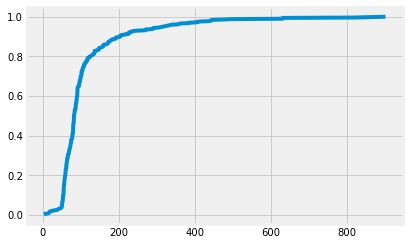

In [16]:
#Funzione comunalativa empirica
from statsmodels.distributions.empirical_distribution import ECDF
dist = ECDF(data['Weight'].dropna())
plt.plot(dist.x, dist.y)
plt.show()

Il concetto di frequenza si specializza in questo caso andando a contare il numero di osservazioni in cui i due caratteri considerati assumono due determinati valori, ottenendo la cosiddetta frequenza congiunta assoluta

In [17]:
int_gender_freq = pd.crosstab(index=data['Intelligence'], 
                              columns=data['Gender'])

int_gender_freq

Gender,F,M
Intelligence,,
average,38,101
good,78,165
high,27,112
low,0,13
moderate,21,37


In [18]:
pd.crosstab(index=pd.cut(data['Weight'],
                         bins=[30, 50, 80, 100, 200, 500, 1000], right = False),
            columns=[data['Gender']])

Gender,F,M
Weight,,
"[30, 50)",4,4
"[50, 80)",116,88
"[80, 100)",5,111
"[100, 200)",11,84
"[200, 500)",5,38
"[500, 1000)",1,5


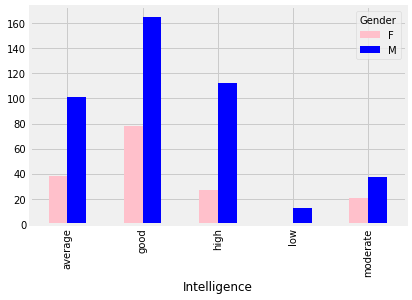

In [19]:
int_gender_freq.plot.bar(color=['pink', 'blue'], stacked=False)
plt.show()

In [20]:
pd.crosstab(index=data['Intelligence'], 
            columns=data['Gender'],
            margins=True,
            normalize='all')

Gender,F,M,All
Intelligence,,,
average,0.064189,0.170608,0.234797
good,0.131757,0.278716,0.410473
high,0.045608,0.189189,0.234797
low,0.000000,0.021959,0.021959
moderate,0.035473,0.062500,0.097973
All,0.277027,0.722973,1.000000


Scatter Plot

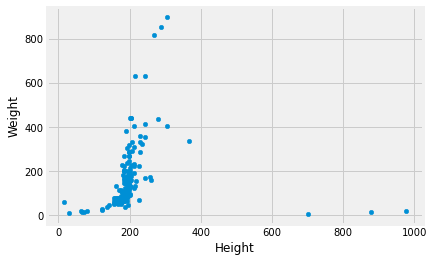

In [21]:
data[data['Gender']=='M'].plot.scatter('Height', 'Weight')
plt.show()
#è possibile aggiungere una retta per evidenziare il tipo di relazione

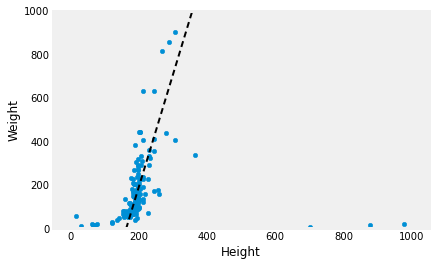

In [22]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

heroes_with_data = data[data['Gender']=='M'].copy().dropna()
heroes_with_data = heroes_with_data[heroes_with_data['Height']<300]

X = heroes_with_data.loc[:, ['Height']]
Y = heroes_with_data['Weight']

regr.fit(X, Y)

data[data['Gender']=='M'].plot.scatter('Height', 'Weight')

line, = plt.plot([0, 1000], regr.predict([[0], [1000]]), color='black')
line.set_dashes([3, 2])
line.set_linewidth(2)
plt.ylim(0,1000)
plt.grid()
plt.show()

In [23]:
#Indice di Gini
def gini(series):
    return 1 - (sum(series.value_counts(normalize=True)
                    .map(lambda f: f**2)))

#indice di gini normalizzato
def num_values(series):
    return len(series.unique())

def normalized_gini(series):
    s = num_values(series)
    return s * gini(series) / (s-1)

#Entropia
def entropy(series):
    return sum((series.value_counts(normalize=True)
                      .map(lambda f: -f * np.log2(f))))

Alberi di decisione
Si basano sugli indici di eterogeneità 

In [24]:
good_guys = data.loc[['Wonder Woman',
                        'Aquaman',
                        'Cyborg',
                        'Flash II']]
bad_guys = data.loc[['Black Manta',
                       'Penguin',
                       'Joker',
                       'Deathstroke',
                       'Bizarro']]
all_guys = pd.concat([good_guys, bad_guys])

features = ['Height', 'Weight', 'Gender', 'First appearance',
            'Hair color', 'Eye color', 'Strength', 'Intelligence']
X = all_guys[features]

Y = pd.concat([pd.DataFrame(['good guy'] * len(good_guys),
                            index=good_guys.index),
               pd.DataFrame(['bad guy'] * len(bad_guys),
                            index=bad_guys.index)])

In [25]:
from sklearn.preprocessing import LabelEncoder

#richiede che i dati siano espressi utilizzando esclusivamente valori numerici. 
gender_encoder = LabelEncoder()
gender_encoder.fit(all_guys['Gender'])

eye_col_encoder = LabelEncoder()
eye_col_encoder.fit(all_guys['Eye color'])

hair_col_encoder = LabelEncoder()
hair_col_encoder.fit(all_guys['Hair color'])

intelligence_encoder = LabelEncoder()
_ = intelligence_encoder.fit(all_guys['Intelligence'])

In [26]:
#transform converte la serie corrispondente
all_guys['Gender'] = gender_encoder.transform(all_guys['Gender'])
all_guys['Eye color'] = eye_col_encoder.transform(all_guys['Eye color'])
all_guys['Hair color'] = hair_col_encoder.transform(all_guys['Hair color'])
all_guys['Intelligence'] = intelligence_encoder.transform(all_guys['Intelligence'])

X = all_guys[features]

In [27]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

#si usa il metodo predict per verificare quale etichetta venga associata agli oggetti di partenza
predictions = clf.predict([X.loc[name] for name in X.index])
predictions

array(['good guy', 'good guy', 'good guy', 'good guy', 'bad guy',
       'bad guy', 'bad guy', 'bad guy', 'bad guy'], dtype=object)

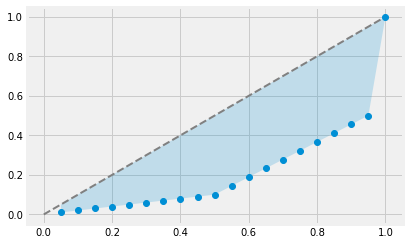

In [28]:
#Concentrazione

tot = 10
n = 20
a = [tot/100]*10 + [tot*4/90]*9 + [tot/2]
q = np.cumsum(a) / tot
f = np.arange(1, n+1) / n
plt.fill_between(f, f, q, alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2, c='gray')
plt.plot(f, q, 'o')
plt.show()

Indici di dispersione

In [29]:
heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)

In [30]:
year = heroes['First appearance']
year.var() # varianza campionaria

388.7687050520392

In [31]:
year.std() #deviazione standard

19.717218491766

In [32]:
year.describe() #calcola i principali indici descrittivi di centralità e dispersione

count     367.000000
mean     1979.855586
std        19.717218
min      1933.000000
25%      1965.000000
50%      1979.000000
75%      1994.000000
max      2099.000000
Name: First appearance, dtype: float64

In [33]:
year.quantile(.15) #restituisce il quantile corrispondente al livello specificato come argomento.

1963.0

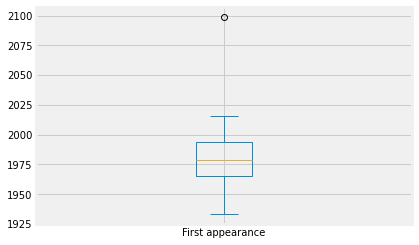

In [34]:
#Box plot
year.plot.box(vert = True)
plt.show()

d:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


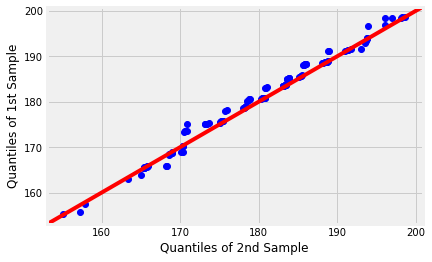

In [35]:
#Diagrammi QQ
#è una rappresentazione grafica che considera due campioni al fine 
#di valutare la validità dell'ipotesi che i campioni stessi seguano una medesima distribuzione
import statsmodels.api as sm

marvel = heroes.loc[(heroes['Publisher']=='Marvel Comics') & \
                    (heroes['Height'].between(150, 200))]

dc = heroes.loc[(heroes['Publisher']=='DC Comics') & \
                (heroes['Height'].between(150, 200))]

marvel_sample = marvel['Height'].sample(120) #campione casuale di 120 elementi
dc_sample = dc['Height'].sample(120)

sm.qqplot_2samples(marvel_sample, dc_sample, line='45')
plt.show()

Si nota infine che una standardizzazione dei dati permette di confinare il grafico ottenuto in prossimità dell'origine. In tal modo diventa più facile accorgersi di eventuali valori fuori scala.

d:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


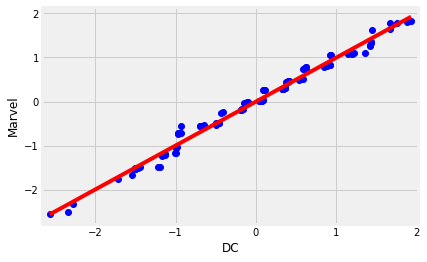

In [36]:
sm.qqplot_2samples((marvel_sample-marvel_sample.mean())/marvel_sample.std(),
                   (dc_sample-dc_sample.mean())/dc_sample.std(),
                   line='s',
                   xlabel='DC', ylabel='Marvel')
plt.show()

d:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


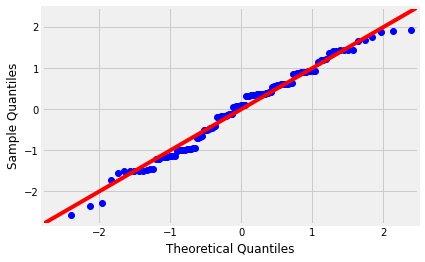

In [37]:
#Controllo se segue distribuzione normale
import statsmodels.api as sm
sm.qqplot(dc_sample,fit=True, line='45')
plt.show()

Tra le distribuzioni approssimativamente simmetriche, un ruolo particolare spetta alle cosiddette distribuzioni _approssimativamente normali_, in cui la simmetria è accompagnata da una forma "a campana" del grafico delle frequenze. In questo tipo di distribuzioni i dati si concentrano attorno alla media campionaria secondo la seguente _regola empirica_:

- approssimativamente il 68% delle osservazioni dista dalla media campionaria non più di una deviazione standard campionaria;
- approssimativamente il 95% delle osservazioni dista dalla media campionaria non più di due deviazioni standard campionarie;
- approssimativamente il 99.7% delle osservazioni dista dalla media campionaria non più di tre deviazioni standard campionarie.

Siccome il grafico delle frequenze dell'altezza ha approssimativamente un andamento a campana, possiamo controllare numericamente se questa regola empirica risulti verificata.

In [38]:
def check_empirical_rule(n):
    within = len(sample[np.abs(sample - sample.mean()) < n*sample.std()])
    return  within / len(sample)

sample = heroes[(heroes['Height'].between(150, 220))]['Height']
pd.DataFrame([check_empirical_rule(n) for n in range(1, 4)], columns=['%'],
             index=range(1, 4))

,%
1,0.672269
2,0.947479
3,0.993697


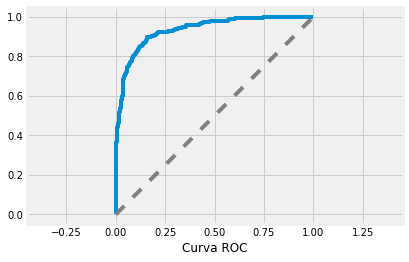

In [39]:
#Classificatore a soglia
#Un classificatore a soglia effettua il procedimento di classificazione di un generico oggetto calcolando una quantità 
# verificando poi che quest'ultima sia superiore a una soglia prefissata. 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
Xtrain = X[:9000]
Xtest = X[9000:]
ytrain = y[:9000]
ytest = y[9000:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

from sklearn import metrics

preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.xlabel('Curva ROC')
plt.axis('equal')
plt.show()

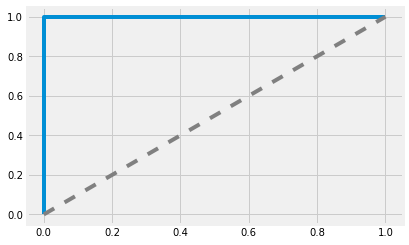

In [40]:
#in funzione delle etichette che individuano le classi degli oggetti e delle probabilità emesse dal classificatore 
#determina automaticamente quali sono i valori sensati da considerare per la soglia sulla probabilità 
from sklearn import metrics
y = [1, 0, 1, 1, 0]
prob = [.7, .4, .8, .7, .3]
fpr, tpr, _ = metrics.roc_curve(y, prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')
plt.show()

In [41]:
#Analisi della varianza
def anova(groups):
    all_elements = pd.concat(groups)
    
    sum_total = sum((all_elements - all_elements.mean())**2)
    sum_within = sum([sum((g - g.mean())**2) for g in groups])
    
    sum_between = sum([len(g) * (g.mean()-all_elements.mean())**2
                       for g in groups])
    #effettua un controllo, passo un invariante che dovrebbe essere true, se non lo è c'è stato un errore
    assert(np.abs(sum_total - sum_within - sum_between) < 10**-5)
    n = len(all_elements)
    total_var = sum_total / (n-1)
    within_var = sum_within / (n-len(groups))
    
    return (total_var, within_var*(n-len(groups))/(n-1))

Variabili aleatorie

In [42]:
#Uso dei modelli
import scipy.stats as st

#Var = st.mod(param)
X = st.poisson(5)

X.pmf(range(15)) #funzione di massa di probabilità P (X = x) se discreta
                    #altrimenti X.pdf
x = range(15)

#plt.vlines(x, 0, X.pmf(x))
#plt.plot(x, X.pmf(x), 'o')
#plt.show()

X.cdf(5) # calcola la funzione di ripartizione valore per valore, ritornando un array P(X <= x)

X.mean() #valore atteso
X.var() # varianza
X.std() #deviazione standard


Y = st.expon(scale =1/2) #il modello esponenziale richiede che sia passato l'inverso del parametro considerato

#per ottenere un grafico di una funzione a gradini usa plt.step